# Aufgabe: Handgeschriebene Zahlen erkennen mit Tensorflow / Keras
----------------------------------------------------------------------------------------------------------



## 1 . Importieren der Packages, die für diese Aufgabe gebraucht werden


### 1.1 Aufgabe: Importieren Sie alle abgebildeten Packages

In [48]:
# Import-Statements für die Zahlenerkennung 
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

## 2. Herunterladen des MNIST Datensatzes

### 2.1 Aufgabe: Lade Sie den MNIST Datensatz herunter und spalte Sie den Datensatz in Trainingsbilder/-labels und Testbilder/-labels

In [2]:
# Herunterladen des Datensatz,der aus handgeschriebenen Zahlen besteht
mnist = keras.datasets.mnist
# Nach erfolgreichem Download werden die Daten
# gleich in die beiden Gruppe Train und Test aufgeteilt mit den entsprechendenen Labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## 3. Anzeigen einer Zahl aus dem Datensatz

### 3.1 Aufgabe: Zeige Sie das erste Bild an, welches sich in deinen Trainingsbildern befindet

### 3.2 Aufgabe: Überprüfe das Bild mit dem ersten Trainingslabel. Stimmen die Zahlen überein ?

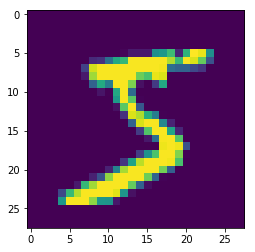

Die Zahl, die auf dem Bild zu sehen ist, ist eine :  5


In [47]:
# Die Zahl wird mithilfe von Matplotlib angezeigt
plt.figure()
plt.imshow(train_images[0])
plt.show()

# Print Statement zeigt den Labelwert an 
print("Die Zahl, die auf dem Bild zu sehen ist, ist eine : " , train_labels[0])

# Stimmen die beiden Zahlen überein ? 

## 4. Erstellung von Modellen 

![alt text](layer.jpg)

### 4.1 Aufgabe: Aus welchen Komponenten besteht ein Modell ? 
-------------------------------------
__Ein Model besteht aus verschiedenen Layern, die miteinander auf unterschiedliche Art verknüpft werden können.__

### 4.2 Definiere die folgenden Core-Layers von Keras: 

   __1.__ Flatten 
   __2.__ Dense 
   __3.__ Dropout 
   __4. *(Optional)*__ Conv1D 

Gehe dafür auf die Dokumentation von [Keras](https://keras.io/layers/core/)

---------------------------------------------------
1. __Flatten__: Der Tensor, welcher reingegeben wird, wird transformiert zu einem "langen" eindimensionalen Vektor. 

      __Beispiel:__ Tensor mit den Dimensionen 3x16 wird zu einem Tensor mit den Dimensionen 48x1
      

2. __Dense__: Der Tensor mit all seinen Input Knoten wird multipliziert mit den Gewichten und anschließend mit allen Output Knoten verknüpft. Die Funktion laut Keras Dokumentation sieht folgendermaßen aus:

    __output = activation(dot(input, kernel) + bias)__ 
    
    dot = Matrixmultiplikation
    
    kernel = Anzahl der Outputknoten
    
    activation = Aktivierungsfunktion 
    
    bias = Anpassbare Zahl (nicht wichtig für unseren Algorithmus)

    Die Anzahl der Output Knoten können kleiner oder größer als die Anzahl der Input Knoten sein. 
    
    
3. __Dropout__: Ist eine Funktion die das Overfitting verhindert, indem es manche Knoten zufällig auf den Wert 0 setzt, während der Zeit, in dem das Model trainiert wird. Die Rate, wie häufig ein Knoten auf 0 gesetzt wird, kann angepasst werden mit einer Dezimalzahl zwischen 0 und 1. 


4. __Conv1D:__ Erstellt ein *Convolutional Network*, welches einen 3D Tensor als Input erwartet und einen 3D Tensor ausgibt. 

### 4.3 Aufgabe: Erstelle ein Model, welches die folgenden Layers sequenziell zusammenfügt. 
--------------------------
__1.__ Flatten: Die input_shape=(width,height) des Bildes (28x28).

__2.__ Dense: Es sollen 128 Output Knoten entstehen und die Aktivierungsfunktion *'relu'* genutzt werden.

__3.__ Dense: Es sollen 10 Ouput Knoten entstehen, welche die Zahlen von 0 bis 9 repräsentieren. Aktivierungsfunktion ist *'softmax'* 

In [4]:
# Das erste Model wird erstellt und es werden 3 Layers definiert, die in Reihenfolge arbeiten
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Das zweite Model ist komplexer und wird auch in folgender Sequenz arbeiten
model2 = keras.Sequential([
    keras.layers.Conv1D(64, kernel_size=(3), input_shape=(28,28), activation='relu'),
    keras.layers.Conv1D(128, (3), activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

## 5. Kompilieren der Modelle 

### 5.1 Aufgabe: Kompiliere das Model 

Um das Model zu kompilieren, werden verschiedene Parameter mitgegeben werden. Diese sind *optimizer='adam'*, *loss='sparse_categorical_crossentropy'* und *metrics=['accuracy']*.

--------------------------------------------------------------------------------

In [5]:
# Es werden beiden Model kompiliert bzw. zusammengebaut.
# Die Layer werden miteinander verknüpft und abgespeichert
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 6. Das Model wird trainiert 

### 6.1 Aufgabe: Trainiere das Model und experimentiere mit der Anzahl der Epochen 
---------------------------------------
### 6.2 Aufgabe: Was sind deine Erkenntnisse? Versuche eine Erklärung für diese zu finden. 
----------------------------------------


In [6]:
# Die beiden Model bekommen nun die Trainingsdaten und
# wir geben die Anzahl der Epochen an, die trainiert werden sollen
model1.fit(train_images, train_labels, epochs=5)
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 2.3658 - accuracy: 0.8470
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3638 - accuracy: 0.9093
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2779 - accuracy: 0.9279
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2490 - accuracy: 0.9353
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2266 - accuracy: 0.9415
Epoch 1/5
60000/60000 [==============================] - 21s 353us/sample - loss: 0.6925 - accuracy: 0.8540
Epoch 2/5
60000/60000 [==============================] - 21s 352us/sample - loss: 0.2087 - accuracy: 0.9431
Epoch 3/5
60000/60000 [==============================] - 21s 356us/sample - loss: 0.1644 - accuracy: 0.9546
Epoch 4/5
60000/60000 [==============================] - 21s 358us/sample - loss: 0.1497 - accuracy: 0.9604
Epoch 5/5
60000/60000 [===============

## 7. Evaluierung der Modelle

### Aufgabe 7.1: Evaluiere dein Model mit den Testbildern/-labels
--------------------

In [9]:
# Beide Modelle werden getestet mit den separierten Testdaten und den dazugehörigen Labels
# Die Genauigkeit wird in Prozent angegeben
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print("\n",'Genauigkeit Model 1: ', round(test_acc*100, 2), " %", '\n')

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('\n' ,'Genauigkeit Model 2: ', round(test_acc*100, 2), " %")


10000/10000 [==============================] - 0s 36us/sample - loss: 0.2291 - accuracy: 0.9482

 Genauigkeit Model 1:  94.82  % 

10000/10000 [==============================] - 1s 115us/sample - loss: 44.5839 - accuracy: 0.0703

 Genauigkeit Model 2:  7.03  %


## 8. Generierung der Vorhersagen 

### 8.1 Aufgabe: Erstelle die Vorhersagen für die Testbilder und speicher sie in der Variable *prediction* ab
---------------------------

In [10]:
# Generiert die Vorhersagen für die Testbilder
predictionModel1 = model1.predict(test_images)
predictionModel2 = model2.predict(test_images)

## 9. Auswertung der Vorhersagen

### 9.1 Aufgabe: Guck dir die erste Vorhersage an. Was fällt dir auf ?
-----------------------
Es wird ein Array ausgegeben, welches 10 Werte enthält. Die Werte sind nicht gut lesbar. 

### 9.2 Aufgabe: Benutzt die Numpy Funktion np.argmax(*vorhersage*), um den höchsten Wert zu lokalisieren. 
--------------------

In [11]:
# Eine Vorhersage besteht aus einem Array, welches für jede Zahl von 0-9 eine Wahrscheinlichkeit angibt. 
# Die Wahrscheinlichkeit gibt an, wie sehr sich unser Model sicher ist, dass es genau diese Zahl "sieht"
print("Vorhersage für Model 1: " , predictionModel1[0])
print("Vorhersage für Model 2: " , predictionModel2[0])

Vorhersage für Model 1:  [0.0000000e+00 4.1136433e-14 3.2748429e-11 2.4218672e-11 4.2935608e-35
 9.5992080e-30 0.0000000e+00 1.0000000e+00 2.5686776e-35 1.2540236e-21]
Vorhersage für Model 2:  [1.00629069e-02 2.02881210e-06 4.30607390e-11 1.66790998e-10
 9.10985622e-34 4.71256763e-37 1.15327621e-20 1.04659845e-13
 1.13545957e-23 9.89935100e-01]


In [12]:
# Mithilfe der Numpy-Funktion argmax finden wir in dem Array schnell den höchsten Wert
print("Vorhersage für Model 1: " , np.argmax(predictionModel1[0]))
print("Vorhersage für Model 2: " , np.argmax(predictionModel2[0]))

Vorhersage für Model 1:  7
Vorhersage für Model 2:  9


## 10. Vergleich: Vorhersage vs. Realität

### Aufgabe 10.1: Lass dir das Bild anzeigen (analog Aufgabe 3 ) und überprüfe, ob die Vorhersage deines Models mit dem Label übereinstimmt. 
---------------------

Die Wahrheit ist:  7
Die Vorhersage ist richtig von Model 1


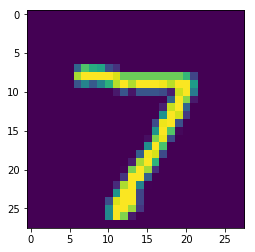

In [15]:
# Die Wahrheit, was sich hinter dem Bild für eine Zahl verbirgt, gibt das Testlabel als Information
print("Die Wahrheit ist: " ,test_labels[0])
# Wenn die Vorhersage und das Label übereinstimmen, 
# dann erscheint auf dem Bildschirm die Nummer und 
# eine Erfolgsmeldung 
if np.argmax(predictionModel1[0]) == test_labels[0] :
    print("Die Vorhersage ist richtig von Model 1")
    plt.figure()
    plt.imshow(test_images[0])
    plt.show()



## 11. Test mit eigener Handschrift

__Hier können eigene Bilder analysiert werden.__

__Die Bilder können in Paint / anderer Freesoftware erstellt werden.__

__Das Format muss 28x28 Pixel sein!__

__Vorraussetzung ist eine weiße Zahl auf schwarzem Hintergrund!__

---------------

### Aufgabe 11.1: Erstelle ein Bild mit 28x28 Pixel. 
------
### Aufgabe 11.2: Der Hintergrund muss komplett schwarz sein!
------
### Aufgabe 11.3: Male eine Zahl zwischen 0 und 9 mit weißer Farbe.
------
### Aufgabe 11.4: Speichere das Bild (PNG- Format) in dem Ordner ab, in dem sich dein Code befindet.
------
### Aufgabe 11.4: Nutzt den folgenden Code, um dein Bild von deinem Model überprüfen zu lassen. 
------
### Aufgabe 11.5: Stimmt deine Zahl mit der Vorhersage des Algorithmus überein ? 

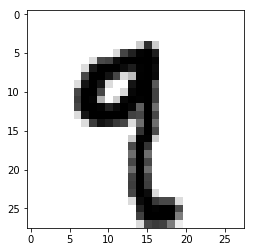

Ich sehe die Nummer:  9 
 Ich sehe die Nummer:  9


In [44]:
# Diese beiden Packages werden für das importieren der selbsterstellten Bilder gebraucht
from PIL import Image
import os

# Dateipfad + Dateiname => importieren das Bild in Python
folder_path = "./"
filename = "test8.png"
image_location = os.path.join(folder_path, filename)

# Bild wird geöffnet und convertiert 
bild = Image.open(image_location).convert("L")

# Bild wird angezeigt 
plt.figure()
plt.imshow(bild)
plt.show()

# Das Bild wird in ein Array umgewandelt, passend für den Algorithmus
bild = np.array(np.resize(bild, (1,28, 28)))
bild = 255-bild
# Eine Vorhersage wird für das Bild gemacht und angezeigt
vorhersage = model1.predict(bild)
vorhersage1 = model2.predict(bild)
print("Ich sehe die Nummer: " , np.argmax(vorhersage), '\n', "Ich sehe die Nummer: " , np.argmax(vorhersage1))